# Diabetes Prediction Using Machine Learning Algorithms
This project focuses on predicting the presence of diabetes in patients using a dataset that includes various health-related measurements. The dataset is derived from the National Institute of Diabetes and Digestive and Kidney Diseases and contains diagnostic measurements that are used to determine whether a patient has diabetes.

## 1. Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import svm
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold

## 2. Viewing The Dataset

In [2]:
df = pd.read_csv("C:/Users/HP/Downloads/diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.shape

(768, 9)

In [6]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
# Replace zeroes with mean
zero_not_accepted = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']

for column in zero_not_accepted:
    df[column] = df[column].replace(0, np.nan)
    mean = int(df[column].mean(skipna = True))
    df[column] = df[column].replace(np.nan, mean)

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.682292,72.386719,29.108073,155.28125,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.435999,12.096642,8.791221,85.02155,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.00000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.50000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,155.00000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.00000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.00000,67.100000,2.420000,81.000000,1.000000


- 0 -> Non - Diabetic
- 1 -> Diabetic

In [11]:
# Number of diabetic and non-diabetic people.
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [12]:
df.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,110.706000,70.920000,27.726000,141.952000,30.880200,0.429734,31.190000
1,4.865672,142.160448,75.123134,31.686567,180.149254,35.381343,0.550500,37.067164


## 3. Data Visualization

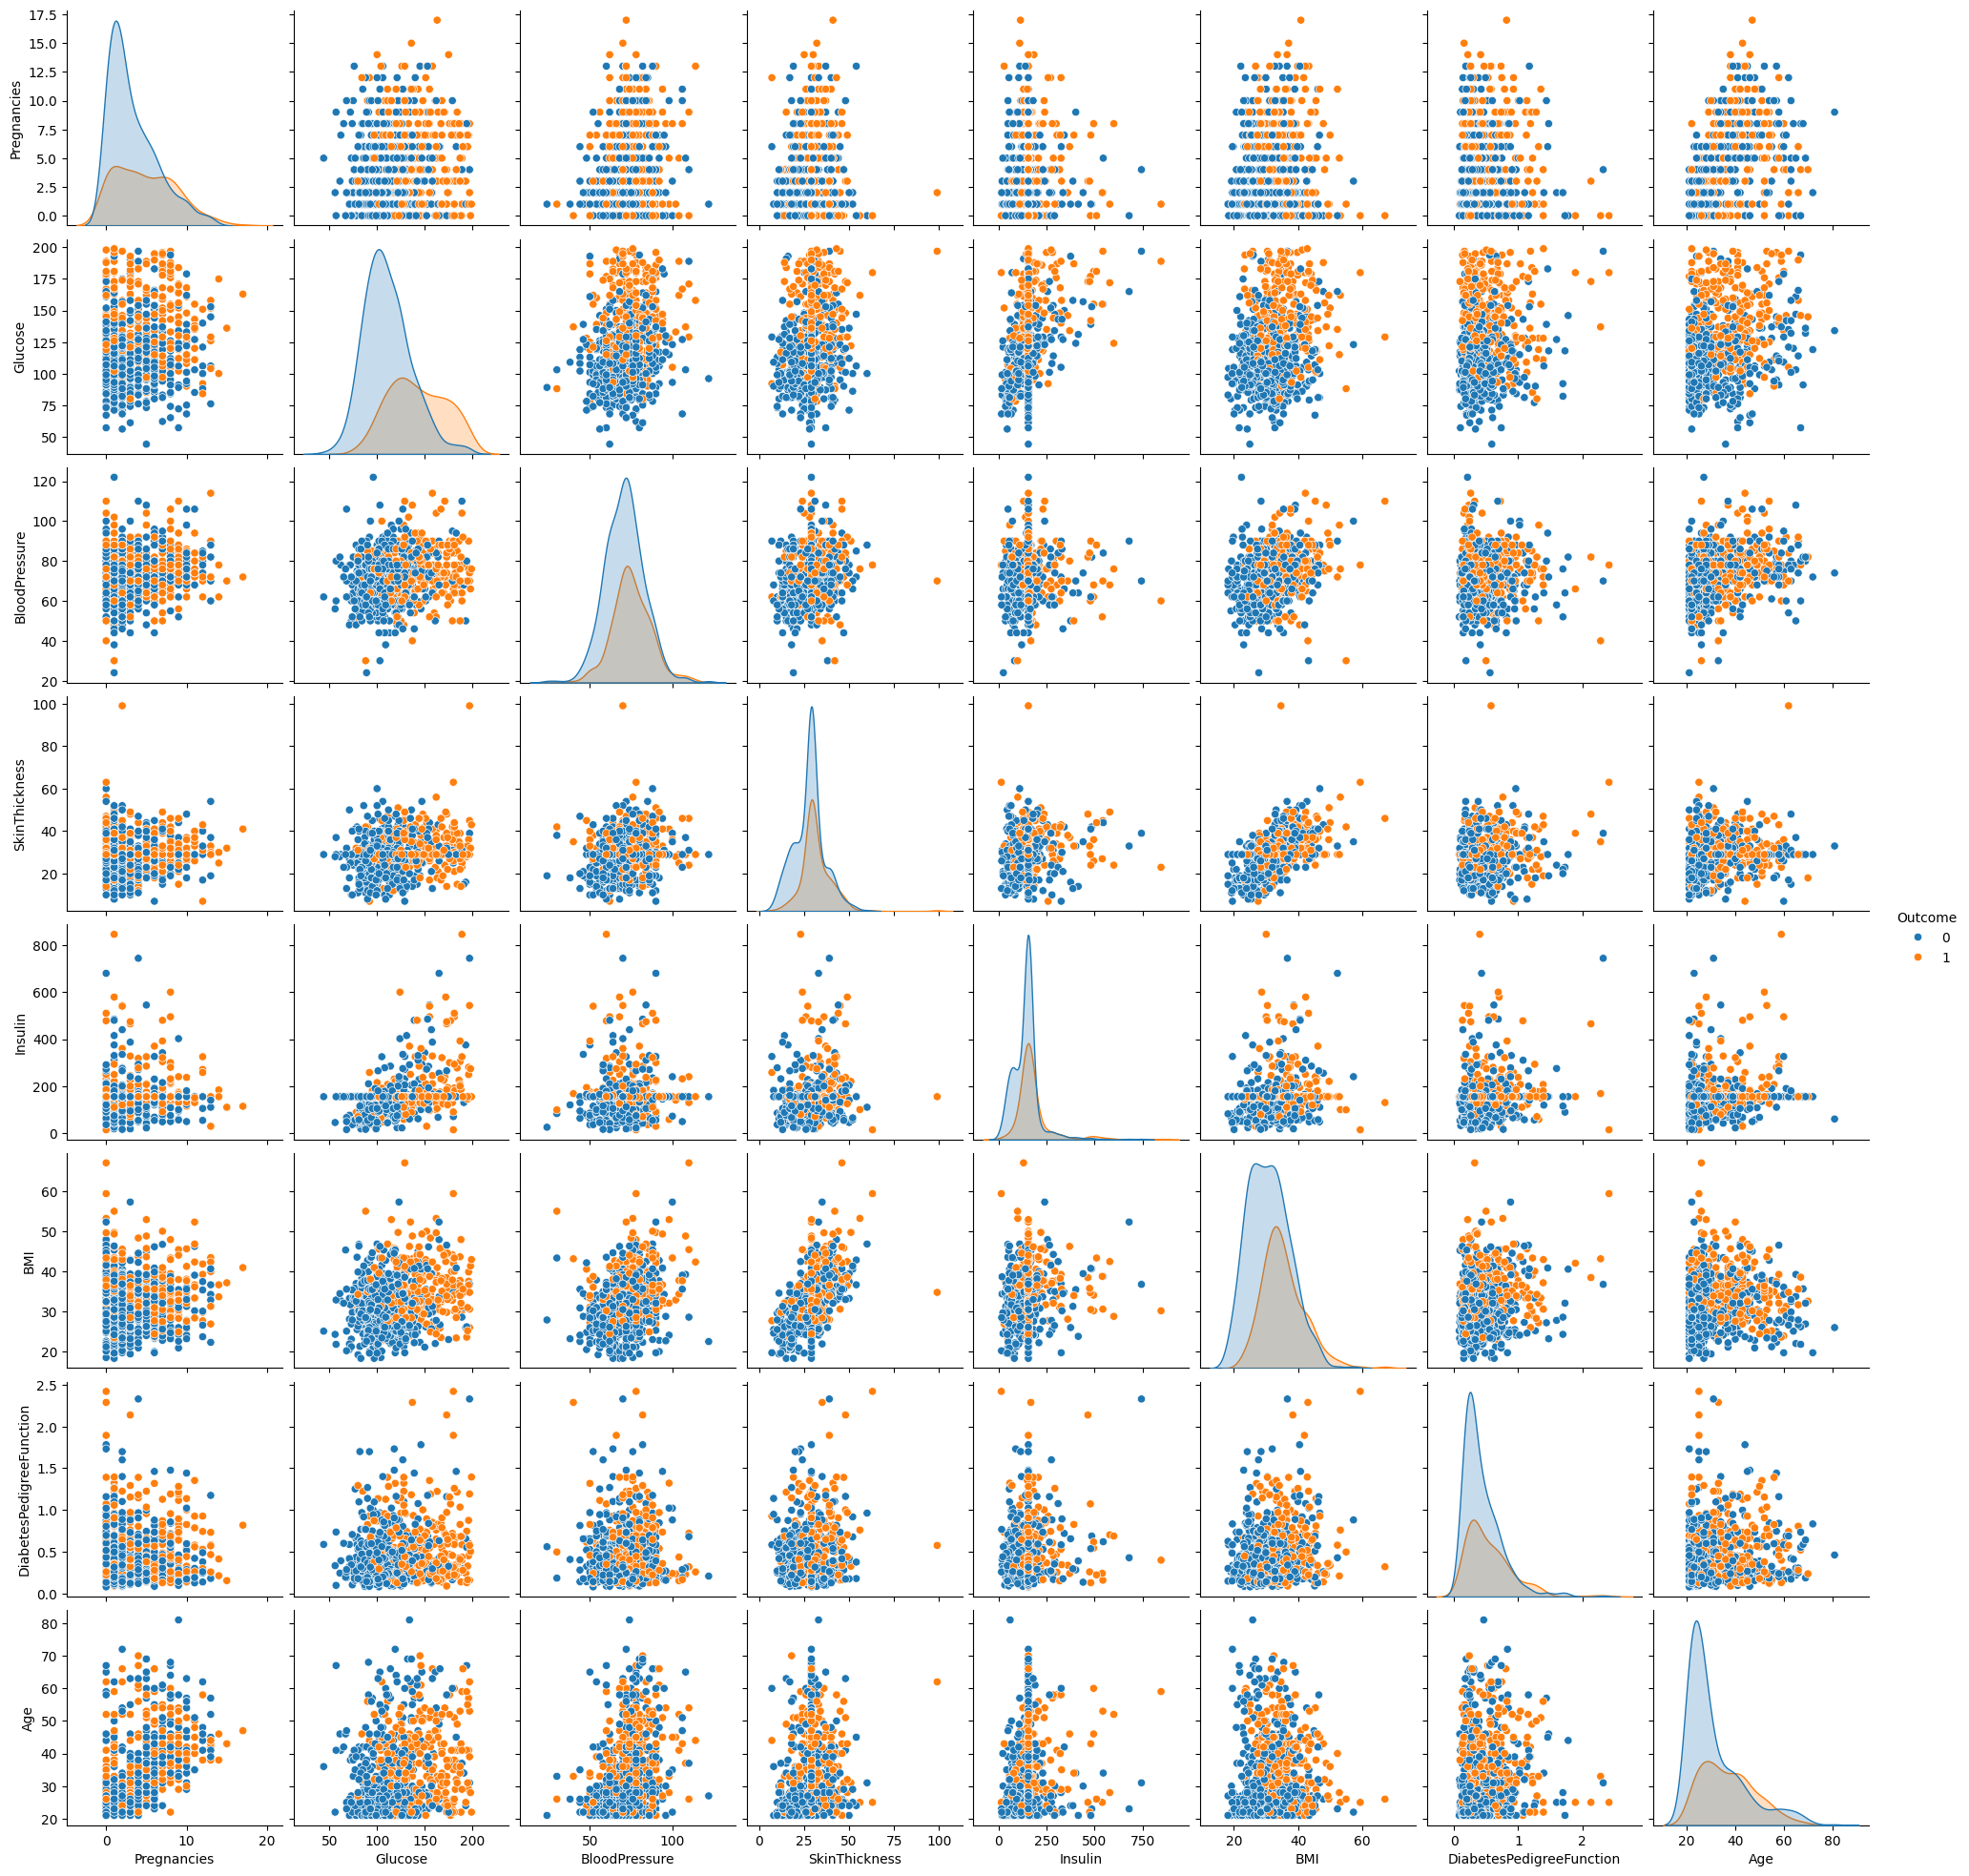

In [10]:
sns.pairplot(df, hue="Outcome")

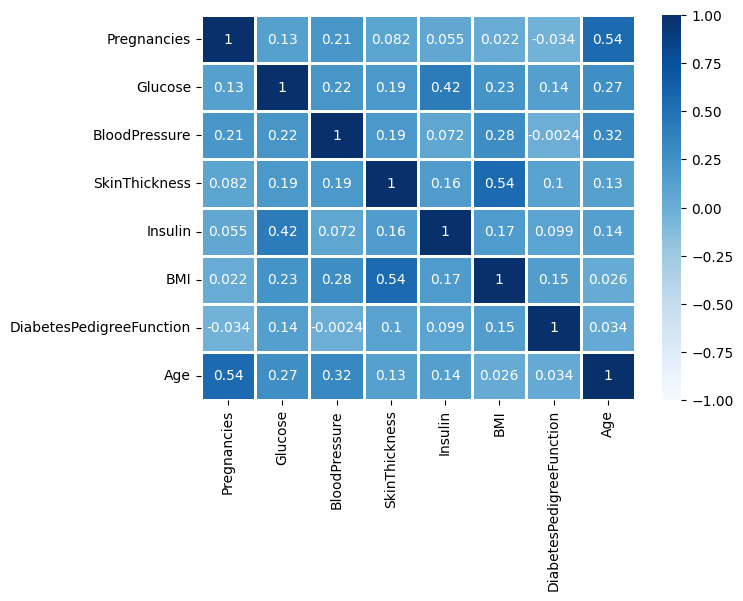

In [13]:
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
correlation_matrix = df[columns].corr()

plt.figure(figsize=(7,5))
sns.heatmap(correlation_matrix, annot = True, linewidths = 1, cmap=plt.cm.Blues, vmin=-1)
plt.show()

## 4. Data Standardization

In [14]:
# Split data into X any y
X = df.drop("Outcome", axis =1)
y = df["Outcome"]

In [15]:
#Feature Scaling
scaler = StandardScaler()
standardized_data = scaler.fit_transform(X)

X = standardized_data

## 5. Train Test Split

In [16]:
#Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 0)

print(f"X_train shape {X_train.shape}")
print(f"Y_train shape {y_train.shape}")
print(f"X_test shape {X_test.shape}")
print(f"Y_test shape {y_test.shape}")

X_train shape (614, 8)
Y_train shape (614,)
X_test shape (154, 8)
Y_test shape (154,)


## 6. Model Training and Testing

### Model 1 - Support Vector Machines

In [17]:
# Search best parameters for SVM model using GridSearchCV()
# c = Regularization parameter. It controls the trade-off between maximizing the margin and minimizing the training error term.
# High 𝛾: Small influence area, complex boundary, overfitting.
# Low 𝛾: Large influence area, smooth boundary, underfitting.

clf = svm.SVC()

kernels = ['linear', 'rbf']
c = [0.1, 1, 10, 100]
gammas = [0.01, 0.1, 1]
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 42)

param_grid = dict(kernel = kernels, C = c, gamma = gammas)
grid_search = RandomizedSearchCV(clf, param_grid, cv = cv, random_state = 42, n_jobs=-1, scoring='accuracy')

grid_result = grid_search.fit(X_train, y_train)
grid_result.best_params_

{'kernel': 'linear', 'gamma': 0.01, 'C': 0.1}

#### Model Evaluation

In [18]:
SVC = svm.SVC(kernel="linear", gamma=0.01, C=0.1)

SVC.fit(X_train, y_train)
y_pred1 = SVC.predict(X_test)

accuracy1 = accuracy_score(y_test, y_pred1)
f1_score1 = f1_score(y_test, y_pred1)
print(f"Accuracy: {accuracy1*100:.2f}")
print(f"f1 score: {f1_score1}")

Accuracy: 75.97
f1 score: 0.6105263157894737


### Model 2 - K Nearest Neighbours

In [24]:
# Finding appropriate k - value

train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1,30)

for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors = neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

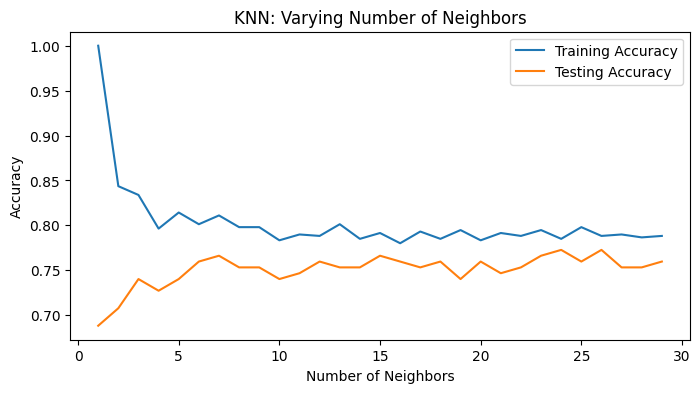

In [25]:
# Plotting k - values
plt.figure(figsize = (8,4))
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_accuracies.values(), label = 'Training Accuracy')
plt.plot(neighbors, test_accuracies.values(), label = 'Testing Accuracy')

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

In [26]:
# Hyperparameter Tuning
knn = KNeighborsClassifier()

neighbors = np.arange(1,30)
weight = ["uniform","distance"]
metrics = ["euclidean","manhattan","minkowski"]
param_grid = dict(n_neighbors=neighbors, metric = metrics, weights = weight)

cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 42)
grid_search = GridSearchCV(knn, param_grid, n_jobs = -1, cv = cv, scoring = "accuracy")

grid_result = grid_search.fit(X_train, y_train)
grid_result.best_params_

{'metric': 'euclidean', 'n_neighbors': 17, 'weights': 'distance'}

#### Model Evaluation

In [27]:
#Create model based on tuned-Hyperparameters
knn = KNeighborsClassifier(n_neighbors = 17, p=2, metric = "euclidean", weights = "distance")

knn.fit(X_train, y_train)
y_pred2 = knn.predict(X_test)

accuracy2 = accuracy_score(y_test, y_pred2)
f1_score2 = f1_score(y_test, y_pred2)
print(f"Accuracy: {accuracy2*100:.2f}")
print(f"f1 score: {f1_score2}")

Accuracy: 75.32
f1 score: 0.62


### Model 3 - Logistic Regression

In [28]:
# Hyperparameter Tuning
logisticReg = LogisticRegression()

c = [100, 10, 1, 0.1, 0.01]
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty_values = ['l2']
param_grid = dict(C=c, penalty=penalty_values, solver=solvers)

cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state=42)
search_grid = GridSearchCV(logisticReg, param_grid, n_jobs = -1, cv = cv, scoring = "accuracy")
grid_result = search_grid.fit(X_train, y_train)
grid_result.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}

#### Model Evaluation

In [29]:
# Create model based on tuned-Hyperparameters

logisticRegression = LogisticRegression(C=0.1, penalty="l2", solver="liblinear")

logisticRegression.fit(X_train, y_train)
y_pred3 = logisticRegression.predict(X_test)

accuracy3 = accuracy_score(y_test, y_pred3)
f1_score3 = f1_score(y_test, y_pred3)
print(f"Accuracy: {accuracy3*100:.2f}")
print(f"f1 score: {f1_score3}")

Accuracy: 75.97
f1 score: 0.6021505376344086


## 7. Conclusion
The results from the three models show that all models perform similarly in terms of accuracy, around 75%. The F1 scores, which consider both precision and recall, indicate that the KNN model slightly outperforms the others in balancing precision and recall.